## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
new_treatment = df.groupby(['landing_page','group']).count().reset_index()
new_treatment.iloc[[0,3], 2].sum() # iloc 0 and 3 for the mismatch and sum

3893

f. Do any of the rows have missing values?

In [7]:
df.info()
# no missing values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('landing_page == "new_page" & group == "treatment" or landing_page == "old_page" & group == "control"')
df.group.count() - df2.group.count()

3893

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated('user_id',keep='last')]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates('user_id',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


C:\Users\Fgiordano-silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2.query('landing_page == "new_page"').user_id.shape[0]/df2.user_id.shape[0]

0.5000619442226688

In [18]:
df2.group.value_counts() # reviewing groups size

treatment    145310
control      145274
Name: group, dtype: int64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The difference in conversions rate is very small. Both control and treatment have very close sizes and but slightly higher number for treatment leading to higher number of individuals receiving the new_page. For such a small probability difference further inference is required.
We will require to simulate from the null to verify if a variance in conversion  is or not statistically significant.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$H_0: p_{new} - p_{old} <= 0$$

$$H_1: p_{new} - p_{old} > 0$$

$$\alpha = 0.05$$


$$p < 0.05$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#test the null hypothesis

#under the null hyp. both p_new and old are the same using the total converted mean() 
p_old = df2.converted.mean()
p_new = df2.converted.mean()

#Use a sample size for each page on df2
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0] 

# print results
print ("(p_old,p_new,n_old,n_new)")
p_old,p_new,n_old,n_new

(p_old,p_new,n_old,n_new)


(0.11959708724499628, 0.11959708724499628, 145274, 145310)

In [21]:
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# old page converted n_old simulations with p_old chance and vice-versa for new_page 
old_page_converted = np.random.binomial(1,p_old,n_old)
new_page_converted = np.random.binomial(1,p_new,n_new)

# old and new page converted probability
print (" Simulated (p_old, p_new)")
old_page_converted.mean() , new_page_converted.mean()

 Simulated (p_old, p_new)


(0.11903024629321145, 0.11911086642350836)

In [26]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# pnew - pold for this simulation
new_page_converted.mean() - old_page_converted.mean()


8.0620130296915615e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
#Simulate 10,000 p_new - p_old values using this same process and store all 10,000 values in a numpy array called p_diffs
p_diffs = []
for _ in range(10000):
    # old page converted n_old simulations with p_old chance and vice-versa for new_page 
    old_page_converted = np.random.binomial(1,p_old,n_old)
    new_page_converted = np.random.binomial(1,p_new,n_new)
    diff = new_page_converted.mean()- old_page_converted.mean()# compute differences
    p_diffs.append(diff)# append to list
    
p_diffs = np.array(p_diffs)# convert list to np.array

In [30]:
p_diffs

array([-0.00042865, -0.00149553, -0.00084192, ..., -0.00125474,
        0.00035578, -0.00175728])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
# calculated the actual difference from ab_data.csv, store in act_diff 
act_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean() 
act_diff

-0.0015782389853555567

-0.00239035352328 0.00228312328143


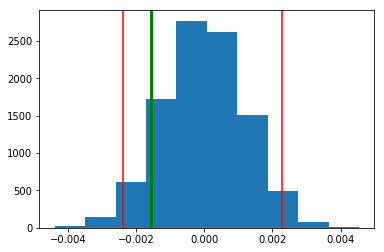

In [32]:
# confidence interval for 95%
lower,upper = np.percentile(p_diffs,2.5),np.percentile(p_diffs,97.5) 
print(lower,upper)

plt.hist(p_diffs);
# plot where our actual_diff, lower and upper fall on p_diffs dist.
plt.axvline(x= act_diff, color = 'g', lw = 3);
plt.axvline(x= lower, color = 'r',);
plt.axvline(x= upper, color = 'r');

Here we have simulated and plotted from the null. Steps a to g , iterate 10000 times; using a binomial distribution to simulate 2 sets of samples, old and new page converted, plus appending each difference in sample means to p_diffs array. 

The plot looks centrally distributed and this was expected due to the Central Limit Theorem (CLT). With a large enough sample size the sampling distribution of the mean will be normally distributed even if the source population is not normally distributed. The CLT is also applied to difference in sample means as used here. 

I've added the 95% confidence interval (CI) to the above plot, plus the actual difference from ab_data file. As my interpretation, any observed difference within our statistics distribution that falls within the CI we can state, with 95% confidence, that we fail to reject the null hypothesis in this case. The observed actual difference is a reasonable outcome of the null hypothesis.


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
(p_diffs > act_diff).mean()

0.90329999999999999

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Here the p-value was computed. It's a calculation of the proportions of values on the sampling distributions of our statistic that are bigger than the actual observed difference.

The definition of a p-value is the probability of observing your statistic (or one more extreme in favour of the alternative) if the null hypothesis is true. 

In this case we failed to reject the null hypothesis due to the large p-value. There is evidence that our statistic was likely to come from the null.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum() # no. of conv for old_page
convert_new = df2.query('landing_page == "new_page"').converted.sum() # as abv for new_page
n_old = df2.query('landing_page == "old_page"').shape[0] # no. of rows w/ old page
n_new = df2.query('landing_page == "new_page"').shape[0] # as abv for new_page

convert_old,convert_new,n_old,n_new # display variables

C:\Users\Fgiordano-silva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#as H_1: p_new - p_old > 0 alternative set to larger, one sided test. 
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative='larger') # followed link example
z_score,p_value 

(-1.3109241984234394, 0.90505831275902449)

In [36]:
from scipy.stats import norm
# http://knowledgetack.com/python/statsmodels/proportions_ztest/
# Tells us how significant our z-score is
# Tells us what our critical value at 95% confidence is
norm.cdf(z_score),norm.ppf(1-(0.05/2))

(0.094941687240975514, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score of ~0.095 is below the 95% critical value of ~1.96. As seen above we fail to reject the null hypothesis. 
Additionally  the p - value is very similar to what was computed in j, ~0.9. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression is more suitable. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#create df_log
df_log = df2.copy()

In [38]:
# add intercept
df_log['intercept'] = 1

# creating dummies vars for landing_page
df_log[['new_page','old_page']] = pd.get_dummies(df2.landing_page)

# mapping ad_page column usind pd.series.map 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
ab_mapping = {'treatment':1,'control':0}
df_log['ab_page'] = df_log['group'].map(ab_mapping)

#view df_lin
df_log.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)#workaround for chisqprob bug
#https://github.com/statsmodels/statsmodels/issues/3931

log_mod = sm.Logit(df_log['converted'], df_log[['intercept','old_page','ab_page']])
results = log_mod.fit()
results.summary()


         Current function value: 0.366118
         Iterations: 35


C:\Users\Fgiordano-silva\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:45:10   Log-Likelihood:            -1.0639e+05
converged:                      False   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3308    1.5e+05  -8.84e-06      1.000   -2.95e+05    2.95e+05
old_page      -0.6579    1.5e+05  -4.37e-06      1.000   -2.95e+05    2.95e+05
ab_page       -0.6729    1.5e+05  -4.47e-06      1.000   -2.95e+05    2.95e+05
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
1/np.exp(results.params) # convert logit coefficients


intercept    3.784198
old_page     1.930817
ab_page      1.959976
dtype: float64

In [41]:
# ab_page equal to new_page dummy var, expected as data treatment done leading to df2 clean, all treatment = new_page
df_log[(df_log.new_page == df_log.ab_page)== False].shape[0] 

0

The page values for both old_page and ab_page are equal to 1. This suggests that both old_page and ab_page are not statistically significant to predict whether or not an individual will convert. Additionally the CI intervals have a large range so the above results are not helpful.

This appears to be the case as every time an X matrix is created that is not full rank.In other words ab_page and new_page columns are the same series. See above code cell.  As new_page was dropped but ab_page kept, all the dummy variables for categorical variable landing_page were kept in the model.


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?



The p-values for ab_page is 1. In part 2 this was approximately 0.90. These values can help understand if the x variable attached to the coefficient has a statistically significant relationship with the response (converted).

In the regression model my null and alternative response are:

                                                          old_page 

$$H_0 : \beta_1 = 0$$
$$H_1: \beta_1 \neq 0$$

                                                          ab_page 
$$H_0 : \beta_2 = 0$$
$$H_1: \beta_2 \neq 0$$

                                                     Compared to part II


$$H_0: p_{new} - p_{old} <= 0$$
$$H_1: p_{new} - p_{old} > 0$$

In both cases we failed to reject the null. In part II there was no statistical evidence the treatment page lead to bigger conversion rates.

For ab_page B2 coefficient will be 0. Leading to the conclusion that there is no statistical evidence that converted rate of a user is linked to which page has been presented during the above experiment.  


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

A/B random assigns visitor to a experimentation. Conversion rate on their own can be a noisy data measure. Changes because of holidays, bugs, time of day or duration of experiment can affect the results. A normal variance has to be assumed. Online experimentation has to give some indication if the change did or did not make a difference above the normal variance.

It's is a good idea to consider other factors as it will be helpful to isolate specific trends and relations between our new variables and the conversion rate. 

However adding other factors creates the risk of Multicollinearity. This occurs when we have predictor variables that are correlated with one another. It can lead to coefficients being the opposite from the direction we expect from simple linear regression.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [43]:
# creating dummy vars for countries
df_new[['CA','UK','US']] = pd.get_dummies(df_new.country)
# mapping ad_page column using pd.series.map now on df_new
df_new['ab_page'] = df_new['group'].map(ab_mapping)
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1


In [44]:
# quick data exploration on how the countries had an impact on conversion vs group and count
df_new.groupby(['country','group']).converted.agg(['mean','count']).reset_index()
# no significant change based on data

,country,group,mean,count
0,CA,control,0.118783,7198
1,CA,treatment,0.111902,7301
2,UK,control,0.120022,36360
3,UK,treatment,0.121171,36106
4,US,control,0.120630,101716
5,US,treatment,0.118466,101903


In [45]:
# adding the intercept plus linear model initiation
df_new['intercept'] = 1
lm = sm.OLS(df_new["converted"],df_new[['intercept','US', 'CA']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Sat, 17 Feb 2018   Prob (F-statistic):              0.201
Time:                        18:45:11   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    100.045      0.000       0.118       0.123
US            -0.0010      0.001     -0.746      0.455      -0.004       0.002
CA            -0.0053      0.003     -1.787      0.074      -0.011       0.001
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We expect a probability of conversion rate to be 0.0010 less for US then the UK ,all else being equal and we expect a probability of conversion rate to be 0.0053 less for CA then the UK ,all else being equal. 

Both p-values are above 0.05. In both cases we failed to reject the null. There was no statistical evidence the user country will lead to bigger conversion rates.

Based on the R-squared value ,  0% of the variability of the conversion rate can be explained by the users' country.



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,CA,UK,US,ab_page,intercept
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1


In [47]:
lm = sm.OLS(df_new["converted"],df_new[['intercept','US', 'CA','ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sat, 17 Feb 2018   Prob (F-statistic):              0.178
Time:                        18:45:12   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1214      0.001     90.150      0.000       0.119       0.124
US            -0.0010      0.001     -0.744      0.457      -0.004       0.002
CA            -0.0053      0.003     -1.784      0.074      -0.011       0.001
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As per prior linear model we expect a probability of conversion rate to be 0.0010 less for US then the UK ,all else being equal. We also expect a probability of conversion rate to be 0.0053 less for CA then the UK ,all else being equal. Both p-values are above 0.05. In both cases we failed to reject the null. There was no statistical evidence the user country will lead to bigger conversion rates.

Regarding what landing page was used we expect a probability of conversion rate to be 0.00106 less for the new page versus the old, all else being equal. With a p-value of 0.191 there is no evidence for us to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.